# Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# import API key
from config import API_Key

#Import citipy to collect latitude and longitudes of cities
from citipy import citipy

# Output File (CSV)
Output_Data_file = "../Output_Data/cities.csv"

# Create Randomized Cities List

In [2]:
# Set the ranges the latitude and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

#Create holding placements for the cordinates and the cities you're making
coordinates = []
cities = []

#Set ranges for coordinates you generate
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lat, lng)

In [3]:
#Connect the coordinates to the cities they match with
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
     
    #sub in 20% to replace any spaces in the URL so it runs correctly
    city = city.replace(" ", "20%")
    
    #Remove duplicates = if the city is not duplicated add it to the list
    if city not in cities:
        cities.append(city)
        
len(cities)

627

In [4]:
#Start the URL for the Weather Map API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + API_Key

In [5]:
#Create lists to add the API data into
city_name = []
country = []
date = []
lat = []
lng = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

# Create a For Loop to Pull Data for Each City
### (API Calls)

In [6]:
#API call counter
api_call_count = 1

#Display counter
print("------------------------------------")
print("Grabbing your info now! Please hold.")
print("------------------------------------")

#Go through the cities in the list and get the API data to fill
for city in cities:
    try: 
        response = requests.get(f"{url}&q={city}").json()
        
        city_name.append(response["name"])
        
        cloudiness.append(response["clouds"]["all"])
        
        country.append(response["sys"]["country"])
        
        date.append(response["dt"])
        
        humidity.append(response["main"]["humidity"])
        
        max_temp.append(response["main"]["temp_max"])
        
        lat.append(response["coord"]["lat"])
        
        lng.append(response["coord"]["lon"])
        
        wind_speed.append(response["wind"]["speed"])
        
        city_record = response["name"]
        
        print(f"Record {api_call_count}: {city_record}")
   

        #Add one to counter to make it cycle through for loop
        api_call_count= api_call_count + 1
    
        #Insert pace to the API calls so we don't get kicked out/banned
        time.sleep(1.01)
    
    
    #If there is no city, skip the line and go to the next one
    except:
        print("No city found for that listing. Moving onto the next.")
    continue
    
    print("-----------------------------")
    print("Data Retrieval Complete")
    print("-----------------------------")
    
    

------------------------------------
Grabbing your info now! Please hold.
------------------------------------
Record 1: Atuona
No city found for that listing. Moving onto the next.
Record 2: Panzhihua
Record 3: Narsaq
Record 4: Yashan
Record 5: Provideniya
Record 6: Beyneu
Record 7: Kaitangata
Record 8: Hamilton
Record 9: Rikitea
No city found for that listing. Moving onto the next.
Record 10: Taoudenni
Record 11: Bilma
No city found for that listing. Moving onto the next.
Record 12: Zhigansk
Record 13: Upernavik
Record 14: Hobart
Record 15: Misratah
Record 16: Lorengau
Record 17: Albany
Record 18: Tuktoyaktuk
Record 19: Barrow
Record 20: Hilo
Record 21: Iqaluit
No city found for that listing. Moving onto the next.
Record 22: Kavieng
Record 23: Mehamn
Record 24: Dikson
Record 25: Vaini
Record 26: Rize
Record 27: Ugoofaaru
Record 28: Yellowknife
Record 29: Constitución
Record 30: Borogontsy
Record 31: Fernley
No city found for that listing. Moving onto the next.
Record 32: Acapulco de 

Record 215: Galyugayevskaya
Record 216: Pisco
Record 217: Oruzgan
Record 218: Buala
Record 219: Shubarkuduk
Record 220: Dalvik
No city found for that listing. Moving onto the next.
Record 221: Thompson
Record 222: Souillac
No city found for that listing. Moving onto the next.
Record 223: Miyako
Record 224: Makkah al Mukarramah
Record 225: Vila
Record 226: Yining
Record 227: Ostrovnoy
No city found for that listing. Moving onto the next.
Record 228: Topchikha
No city found for that listing. Moving onto the next.
Record 229: El Salvador
No city found for that listing. Moving onto the next.
Record 230: Batagay-Alyta
No city found for that listing. Moving onto the next.
Record 231: Tyup
Record 232: Bajil
Record 233: Margate
Record 234: Carnarvon
Record 235: Palmer
Record 236: Batagay
Record 237: Lagoa
Record 238: Lompoc
No city found for that listing. Moving onto the next.
Record 239: Krugersdorp
Record 240: Gornopravdinsk
No city found for that listing. Moving onto the next.
No city found

Record 442: Tomatlán
Record 443: Kortkeros
Record 444: Riyadh
Record 445: Māngrol
Record 446: Villazón
No city found for that listing. Moving onto the next.
Record 447: Kokkola
Record 448: Alugan
Record 449: Puksoozero
Record 450: Trincomalee
No city found for that listing. Moving onto the next.
No city found for that listing. Moving onto the next.
No city found for that listing. Moving onto the next.
Record 451: Bilibino
No city found for that listing. Moving onto the next.
Record 452: Huangmei
Record 453: Teguise
Record 454: Nishihara
Record 455: Kigali
Record 456: Visnes
No city found for that listing. Moving onto the next.
Record 457: Jablah
Record 458: Nizhneangarsk
No city found for that listing. Moving onto the next.
Record 459: Marin
Record 460: Gamba
Record 461: Mosquera
Record 462: Kokopo
Record 463: Soller
Record 464: Keflavik
Record 465: Hope
Record 466: Mīnāb
Record 467: Awjilah
No city found for that listing. Moving onto the next.
Record 468: Selma
No city found for that 

# Turn Data from API into a DF

In [7]:
#Have to do this in order to populate scatter plots

In [10]:
weather_dict = pd.DataFrame({"City": city_name,
                             "Cloudiness": cloudiness,
                             "Country": country,
                             "Humidity": humidity,
                             "Lat": lat,
                             "Lng": lng,
                             "Max Temp": max_temp,
                             "Wind Speed": wind_speed})

In [11]:
#Display Dict as DF
weather_dict.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,79,PF,79,-9.8000,-139.0333,80.4,6.51
1,Panzhihua,100,CN,55,26.5851,101.7128,59.0,2.13
2,Narsaq,90,GL,87,60.9167,-46.0500,37.4,1.14
3,Yashan,100,CN,75,22.1975,109.9419,70.7,7.00
4,Provideniya,0,RU,61,64.3833,-173.3000,6.8,4.47


In [12]:
# Save city data into a csv file
#weather_dict.to_csv("Output_Data/cities.csv", index = False)

# Create Scatter Plots & Plot Data

In [13]:
#We will be creating scatter plots to represent the following data
# -Temperature (F) vs. Latitude
# -Humidity (%) vs. Latitude
# -Cloudiness (%) vs. Latitude
# -Wind Speed (mph) vs. Latitude

### • Temperature (F) vs. Latitude 

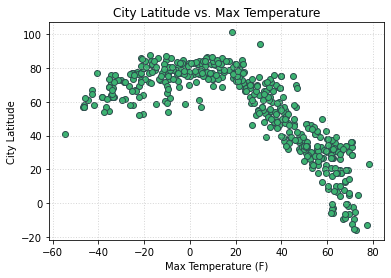

In [14]:
#Plot & Format Data
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "mediumseagreen", edgecolor = "darkslategrey")

#Set All Labels
#Title
plt.title("City Latitude vs. Max Temperature")
#X Axis
plt.xlabel("Max Temperature (F)")
#Y Axis
plt.ylabel("City Latitude")

#Insert Gridlines
plt.grid(linestyle=":", linewidth=1, alpha=0.5)

#### Observations

-

### • Humidity (%) vs. Latitude

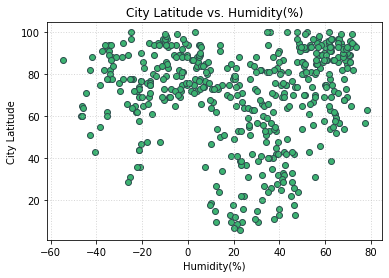

In [15]:
#Plot & Format Data 
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "mediumseagreen", edgecolor = "darkslategrey")

#Set All Labels
#Title
plt.title("City Latitude vs. Humidity(%)")
#X Axis
plt.xlabel("Humidity(%)")
#Y Axis
plt.ylabel("City Latitude")

#Insert Gridlines
plt.grid(linestyle=":", linewidth=1, alpha=0.5)


#### Observations

-

### • Cloudiness (%) vs. Latitude

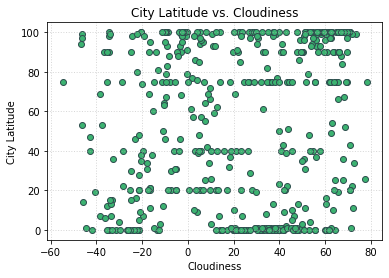

In [16]:
#Plot & Format Data
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "mediumseagreen", edgecolor = "darkslategrey")

#Set All Labels
#Title
plt.title("City Latitude vs. Cloudiness")
#X Axis
plt.xlabel("Cloudiness")
#Y Axis
plt.ylabel("City Latitude")

#Insert Gridlines
plt.grid(linestyle=":", linewidth=1, alpha=0.5)

### • Wind Speed (mph) vs. Latitude

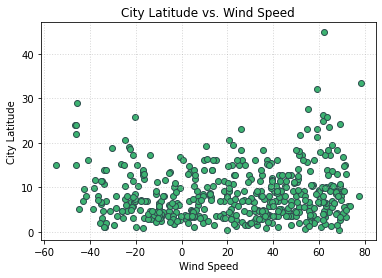

In [17]:
#Plot & Format Data
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "mediumseagreen", edgecolor = "darkslategrey")

#Set All Labels
#Title
plt.title("City Latitude vs. Wind Speed")
#X Axis
plt.xlabel("Wind Speed")
#Y Axis
plt.ylabel("City Latitude")

#Insert Gridlines
plt.grid(linestyle=":", linewidth=1, alpha=0.5)

# Complete Linear Regression

<br> - Northern Hemisphere - Temperature (F) vs. Latitude <br>
<br> - Southern Hemisphere - Temperature (F) vs. Latitude <br>
<br> - Northern Hemisphere - Humidity (%) vs. Latitude <br>
<br> - Southern Hemisphere - Humidity (%) vs. Latitude <br>
<br> - Northern Hemisphere - Cloudiness (%) vs. Latitude <br>
<br> - Southern Hemisphere - Cloudiness (%) vs. Latitude <br>
<br> - Northern Hemisphere - Wind Speed (mph) vs. Latitude <br>
<br> - Southern Hemisphere - Wind Speed (mph) vs. Latitude <br>

## Create DFs for Northern & Southern Hemispheres

In [18]:
#
north_hemi = weather_dict.loc[weather_dict["Lat"] >= 0]
south_hemi = weather_dict.loc[weather_dict["Lat"] < 0]

## Create New Scatter Plots with Regression

### • Northern Hemisphere - Temperature (F) vs. Latitude

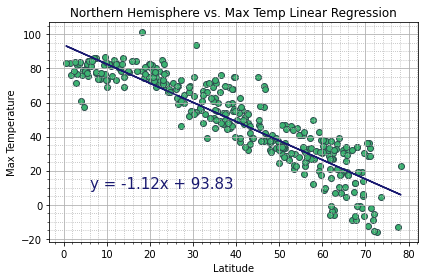

The r-value is: -0.9


In [19]:
# Add the linear regression equation and line to plot

x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values, facecolor = "mediumseagreen", edgecolor = "darkslategrey")
plt.plot(x_values, regress_values, "r-", color="midnightblue")
plt.annotate(line_eq,(6,10),fontsize=15, color="midnightblue")

#-------------------------------------------------------------------
#Formatting

plt.title("Northern Hemisphere vs. Max Temp Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")

### • Southern Hemisphere - Temperature (F) vs. Latitude

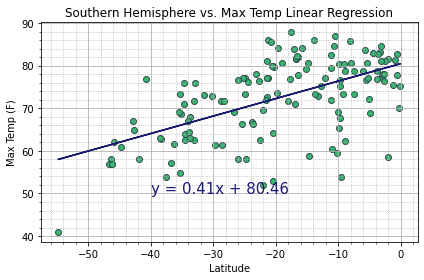

The r-value is: 0.58


In [20]:
# Add the linear regression equation and line to plot

x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values, facecolor = "mediumseagreen", edgecolor = "darkslategrey")
plt.plot(x_values, regress_values, "r-", color="midnightblue")
plt.annotate(line_eq,(-40,50),fontsize=15, color="midnightblue")

#-------------------------------------------------------------------
#Formatting

plt.title("Southern Hemisphere vs. Max Temp Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")

### • Northern Hemisphere - Humidity (%) vs. Latitude

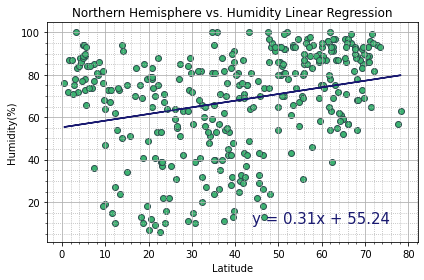

The r-value is: 0.27


In [21]:
# Add the linear regression equation and line to plot

x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values, facecolor = "mediumseagreen", edgecolor = "darkslategrey")
plt.plot(x_values, regress_values, "r-", color="midnightblue")
plt.annotate(line_eq,(44,10),fontsize=15, color="midnightblue")

#-------------------------------------------------------------------
#Formatting

plt.title("Northern Hemisphere vs. Humidity Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")

### • Southern Hemisphere - Humidity (%) vs. Latitude

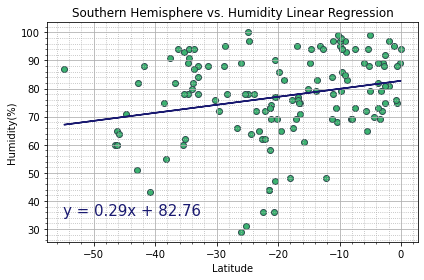

The r-value is: 0.24


In [22]:
# Add the linear regression equation and line to plot

x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values, facecolor = "mediumseagreen", edgecolor = "darkslategrey")
plt.plot(x_values, regress_values, "r-", color="midnightblue")
plt.annotate(line_eq,(-55, 35),fontsize=15, color="midnightblue")

#-------------------------------------------------------------------
#Formatting

plt.title("Southern Hemisphere vs. Humidity Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")

### •Northern Hemisphere - Cloudiness (%) vs. Latitude

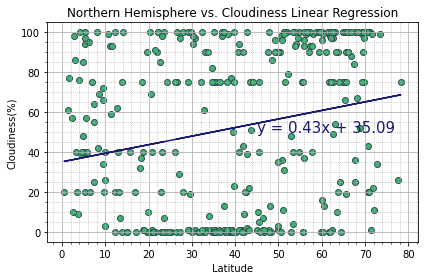

The r-value is: 0.22


In [23]:
# Add the linear regression equation and line to plot

x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values, facecolor = "mediumseagreen", edgecolor = "darkslategrey")
plt.plot(x_values, regress_values, "r-", color="midnightblue")
plt.annotate(line_eq,(45, 50),fontsize=15, color="midnightblue")

#-------------------------------------------------------------------
#Formatting

plt.title("Northern Hemisphere vs. Cloudiness Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")

### •Southern Hemisphere - Cloudiness (%) vs. Latitude

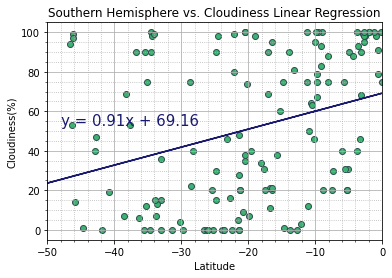

The r-value is: 0.32


In [24]:
# Add the linear regression equation and line to plot

x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values, facecolor = "mediumseagreen", edgecolor = "darkslategrey")
plt.plot(x_values, regress_values, "r-", color="midnightblue")
plt.annotate(line_eq,(-48, 53),fontsize=15, color="midnightblue")

#-------------------------------------------------------------------
#Formatting

plt.title("Southern Hemisphere vs. Cloudiness Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.xlim(-50, 0)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")

### •Northern Hemisphere - Wind Speed (mph) vs. Latitude

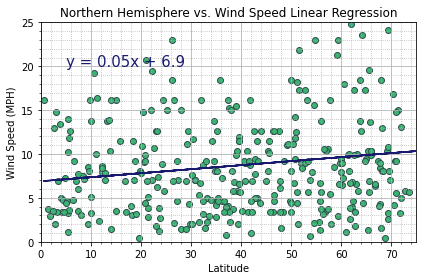

The r-value is: 0.16


In [25]:
# Add the linear regression equation and line to plot

x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values, facecolor = "mediumseagreen", edgecolor = "darkslategrey")
plt.plot(x_values, regress_values, "r-", color="midnightblue")
plt.annotate(line_eq,(5, 20),fontsize=15, color="midnightblue")

#-------------------------------------------------------------------
#Formatting

plt.title("Northern Hemisphere vs. Wind Speed Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.ylim(0, 25)
plt.xlim(0, 75)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")

### •Southern Hemisphere - Wind Speed (mph) vs. Latitude

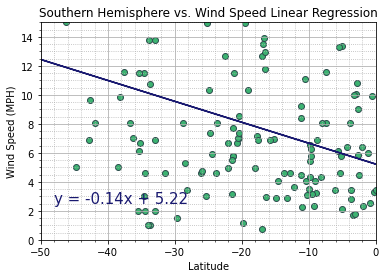

The r-value is: -0.34


In [26]:
# Add the linear regression equation and line to plot

x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values, facecolor = "mediumseagreen", edgecolor = "darkslategrey")
plt.plot(x_values, regress_values, "r-", color="midnightblue")
plt.annotate(line_eq,(-48, 2.5),fontsize=15, color="midnightblue")
#-------------------------------------------------------------------
#Formatting

plt.title("Southern Hemisphere vs. Wind Speed Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.xlim(-50, 0)
plt.ylim(0, 15)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()

#Show what the R-Value is
print(f"The r-value is: {round(rvalue, 2)}")